# This notebook depicts Hierarchical (Agglomerative) Clustering on randomly generated dataset

In [2]:
#Importing the required modules 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import ndimage
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Genearting Random data using make_blobs class

x1, y1 = make_blobs(n_samples= 50, centers=[[4,4], [-2,-1],[1,1],[10,-4]],cluster_std=0.9)

In [4]:
x1[0:5]

array([[ 4.59849307,  4.13477841],
       [-0.08145617,  0.29271511],
       [ 9.34082802, -5.18050961],
       [10.38491477, -3.77662294],
       [ 1.72218634,  2.13862856]])

In [5]:
y1[0:5]

array([0, 2, 3, 3, 2])

In [6]:
print (x1.shape, y1.shape)

(50, 2) (50,)


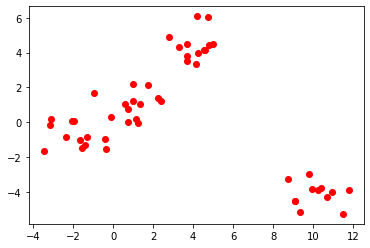

In [7]:
# Scatter plot of the randomly generated data 
plt.scatter(x1[:,0], x1[:,1] ,marker='o',color = 'r')

In [8]:
# Creating the AgglomorativeClustering class object 
# the linkage parameter decides which distance between a set of observation
agglom = AgglomerativeClustering(n_clusters= 4 , linkage = 'average')

In [9]:
agglom

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

In [10]:
# Fitting the model with the randomly generated data x1 and y1 
agglom.fit(x1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

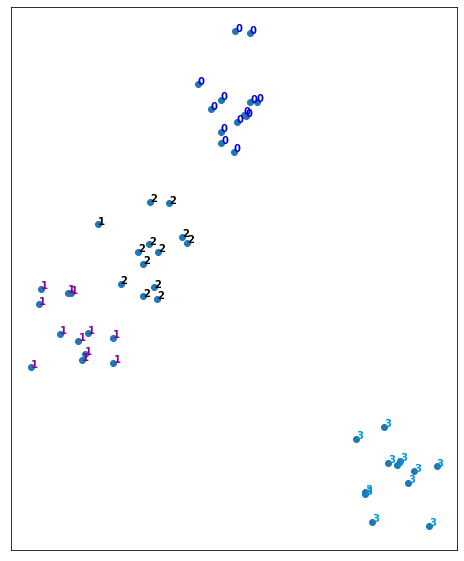

In [19]:
# Plotting the clusers with matplotlib

plt.figure(figsize=(8,10))

for i in range(x1.shape[0]):
  plt.text(x1[i,0],x1[i,1],str(y1[i]), color = plt.cm.nipy_spectral(agglom.labels_[i]/10),fontdict= {'weight':'bold', "size": 10})

# Removing x ticks and y ticks 
plt.xticks([])
plt.yticks([])

# Display the original plot before clustering 
plt.scatter(x1[:,0], x1[:,1])

plt.show()

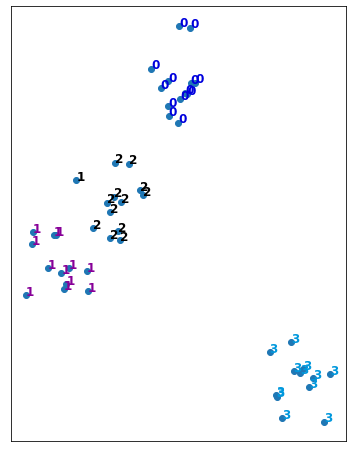

In [25]:
#  The data is scattered very far 
# Scaling the data points to make them close to each other 
x_min = np.min(x1 , axis =0)
x_max = np.max(x1 , axis= 0)

x1 = (x1 - x_min) / (x_max - x_min)
plt.figure(figsize=(6,8))

for i in range(x1.shape[0]):
  plt.text(x1[i,0],x1[i,1],str(y1[i]), color = plt.cm.nipy_spectral(agglom.labels_[i]/10),fontdict= {'weight':'bold', "size": 12})

# Removing x ticks and y ticks 
plt.xticks([])
plt.yticks([])

# Display the original plot before clustering 
plt.scatter(x1[:,0], x1[:,1])

plt.show()

array([-3.43990647, -5.27256462])

[[0.         0.45735247 0.87722866 ... 0.63412245 0.29313837 0.07770398]
 [0.45735247 0.         0.78513076 ... 0.18025714 0.18372982 0.38533947]
 [0.87722866 0.78513076 0.         ... 0.85757496 0.72561938 0.82211296]
 ...
 [0.63412245 0.18025714 0.85757496 ... 0.         0.36319007 0.56396822]
 [0.29313837 0.18372982 0.72561938 ... 0.36319007 0.         0.21627473]
 [0.07770398 0.38533947 0.82211296 ... 0.56396822 0.21627473 0.        ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


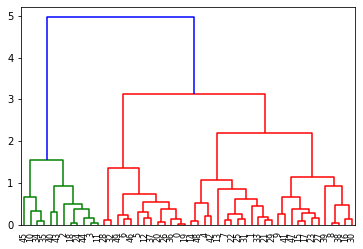

In [30]:
# creating a Dendogram for our Agglomerative Clustering model 

# First creating a distance matrix 
dist_matrix = distance_matrix(x1,x1)
print (dist_matrix)

Z = hierarchy.linkage(dist_matrix, 'complete')

dendo = hierarchy.dendrogram(Z)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


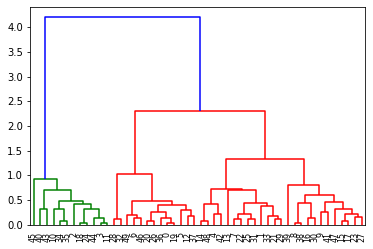

In [33]:
# Using 'average' as linkage 
Z = hierarchy.linkage(dist_matrix , 'average')
dendo = hierarchy.dendrogram(Z)